In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def find_files_with_prefix(directory: str, prefix: str) -> list[str]:
    return [
        file for file in os.listdir(directory)
        if os.path.isfile(os.path.join(directory, file)) and file.startswith(prefix)
    ]


def short_repr(x: int) -> str:
    if x < 1e+3:
        return str(x)
    elif x < 1e+6:
        return f"{x / 1e+3:.1f}K"
    elif x < 1e+9:
        return f"{x / 1e+6:.1f}M"
    elif x < 1e+12:
        return f"{x / 1e+9:.1f}B"

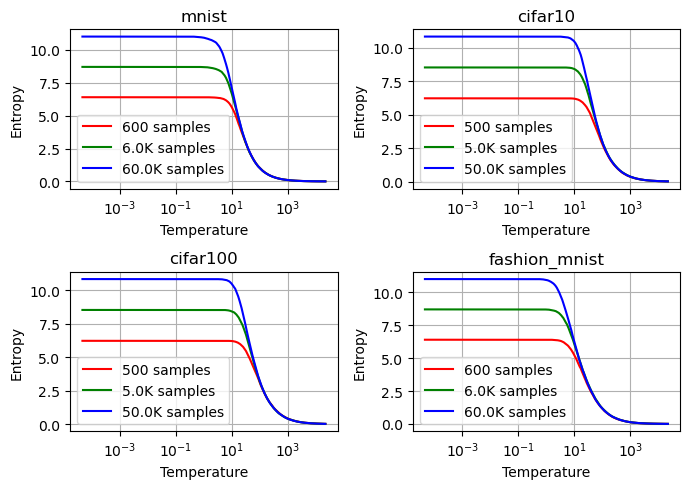

In [3]:
plt.figure(figsize=(7, 5))


datasets = ["mnist", "cifar10", "cifar100", "fashion_mnist"]
colors = ["r", "g", "b"]

for i, dataset in enumerate(datasets, 1):
    plt.subplot(2, 2, i)

    j = 0
    
    for filename in sorted(find_files_with_prefix("./results", f"{dataset}_forward_stats_")):
        try:
            count = int(filename.split("_")[-1].split(".")[0])
        except ValueError:
            continue

        temp, log_Z, U, var_H = np.load(f"results/{filename}").values()
        S = log_Z + U / temp
        plt.plot(temp, -S, label=f"{short_repr(count)} samples", color=colors[j])
        j += 1

    plt.title(dataset)
    plt.xlabel("Temperature")
    plt.ylabel("Entropy")
    plt.xscale("log")
    plt.grid()
    plt.legend()


plt.tight_layout()
plt.show()

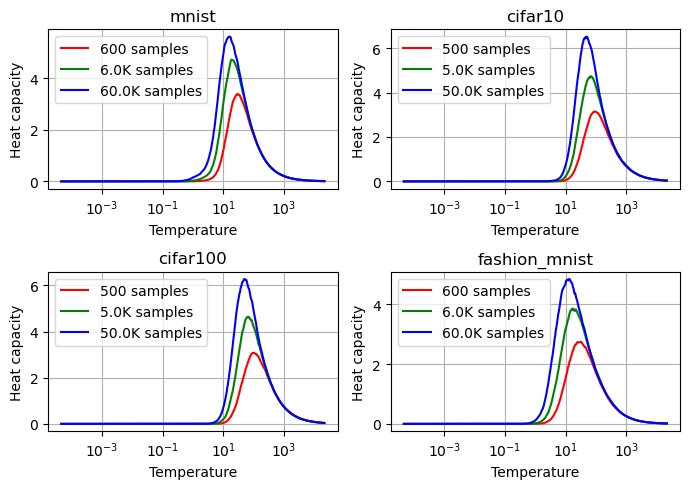

In [4]:
plt.figure(figsize=(7, 5))


datasets = ["mnist", "cifar10", "cifar100", "fashion_mnist"]
colors = ["r", "g", "b"]


for i, dataset in enumerate(datasets, 1):
    plt.subplot(2, 2, i)

    j = 0
    
    for filename in sorted(find_files_with_prefix("./results", f"{dataset}_forward_stats_")):
        try:
            count = int(filename.split("_")[-1].split(".")[0])
        except ValueError:
            continue
        
        temp, log_Z, U, var_H = np.load(f"results/{filename}").values()
        C = var_H / temp ** 2
        plt.plot(temp, C, label=f"{short_repr(count)} samples", color=colors[j])
        j += 1

    plt.title(dataset)
    plt.xlabel("Temperature")
    plt.ylabel("Heat capacity")
    plt.xscale("log")
    plt.grid()
    plt.legend()


plt.tight_layout()
plt.show()